In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns

In [19]:
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=['sans-serif'])
sns.set_style("whitegrid", {"font.sans-serif": ['Taipei Sans TC Beta']})

In [20]:
df = pd.read_csv('./datasource/BaHaMut_9.csv')
df

,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作,人氣度,觀看數(萬)
0,叫我對大哥 (TV版),217000,18083,2021,夏番,12,4.8,600,青木純,Fanworks、SPACE NEKO COMPANY,喜劇,悠閒,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,1,2
1,汪汪與喵喵,66000,2750,2020,秋番,24,4.8,200,岸誠二,Team Till Dawn,喜劇,溫馨,泡麵番,闔家觀賞,NaN,NaN,漫畫改編,新作,0,0
2,鬼滅之刃 刀匠村篇,5488000,498909,2023,春番,11,4.8,18600,外崎春雄,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作,4,50
3,IDOLiSH7 - 偶像星願 - Third BEAT！,560000,18667,2021,夏番,30,4.8,1300,別所誠人,TROYCA,偶像,音樂,NaN,NaN,NaN,NaN,遊戲改編,續作,1,2
4,薄櫻鬼 新OVA,49000,16333,2021,秋番,3,4.8,300,ヤマサキオサム,Studio DEEN,奇幻,戀愛,歷史,NaN,NaN,NaN,遊戲改編,續作,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,土下座跪求給看 年齡限制版,1034000,79539,2020,秋番,13,4.5,1700,永居慎平,アドネロ,動作,喜劇,勵志,18禁,NaN,NaN,漫畫改編,新作,1,8
434,女神宿舍的管理員。 年齡限制版,1127000,112700,2021,夏番,10,4.7,2300,中重俊祐,Asread,校園,喜劇,戀愛,18禁,NaN,NaN,漫畫改編,新作,2,11
435,彼得・格里爾的賢者時間 年齡限制版,1339000,111583,2020,夏番,12,4.2,1600,辰美,Wolfsbane,奇幻,喜劇,18禁,NaN,NaN,NaN,漫畫改編,新作,2,11
436,壽司大相撲,233000,4481,2021,春番,52,4.1,400,助川勇太,白組,喜劇,悠閒,闔家觀賞,泡麵番,NaN,NaN,漫畫改編,新作,0,0


In [21]:
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
df_corr = df[['集數', '星級', '評分人數', '觀看數(萬)', '人氣度']]
arr = std.fit_transform(df_corr)
df_corr[['集數', '星級', '評分人數', '觀看數(萬)', '人氣度']] = arr
featuresCorr = df_corr[['集數', '星級', '評分人數',	'觀看數(萬)', '人氣度']].corr()
featuresCorr

C:\Users\Eddie\AppData\Local\Temp\ipykernel_2128\930612099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[['集數', '星級', '評分人數', '觀看數(萬)', '人氣度']] = arr


,集數,星級,評分人數,觀看數(萬),人氣度
集數,1.000000,-0.024099,0.020247,-0.015658,-0.070986
星級,-0.024099,1.000000,0.276898,0.261274,0.316195
評分人數,0.020247,0.276898,1.000000,0.812143,0.744986
觀看數(萬),-0.015658,0.261274,0.812143,1.000000,0.880655
人氣度,-0.070986,0.316195,0.744986,0.880655,1.000000


<Axes: xlabel='星級', ylabel='觀看數(萬)'>

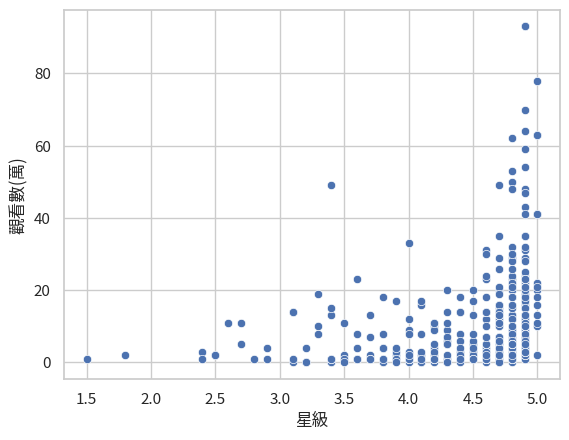

In [22]:
sns.scatterplot(data=df[['星級', '觀看數(萬)']], x="星級", y="觀看數(萬)")

<Axes: ylabel='觀看數(萬)'>

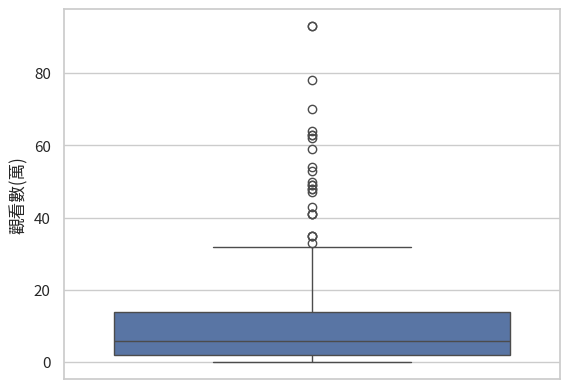

In [23]:
sns.boxplot(data=df['觀看數(萬)'])

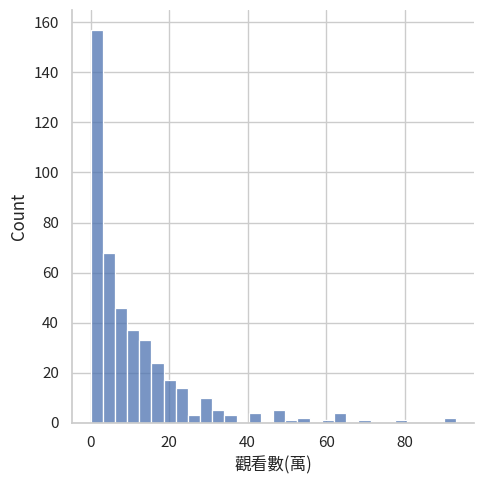

In [24]:
sns.displot(data=df, x='觀看數(萬)')